# TEST: PREDICTING FLIGHT PRICE EVOLUTION

## 1. Problem defintion

This section contains the problem definition from the supplied "Flight price test.pdf" file.


### 1.1. Overview
At eDreams ODIGEO we are always looking for ways to improve customer satisfaction. We want to serve our results, thousands of combinations of flights, as quick and as accurate as possible.

In order to do this, we need to know in advance what itineraries will be of interest, and know their prices so that we can offer these fresh results to our customers. So that will be our objective: knowing in advance what the future price of a given itinerary will be. Fortunately for us, price volatility in flights is perfect material for a Data Science project!

### 1.2. Goal
The goal of this task is to predict as accurately as possible what will be the future price of itineraries. The code can be developed in any of the following languages: Python or R.

### 1.3. Data description
The dataset comprises a set of files with thousands of datapoints that describe the evolution of the price for different itineraries. Bear in mind that an itinerary can consist of several physical flights.

Definition of the different fields would be the following:
- **ID**: (*Int*) unique identifier for a ticketed itinerary.
- **Eventtime**: (*Timestamp*) the timestamp of a given datapoint.
- **Carrier_hash**: (*String*) The code of the carrier operating the flight.
- **Origin**: (*String*) The IATA airport code representing the first departing airport of the route.
- **Destination**: (*String*) The IATA airport code representing the last arriving airport of the route.
- **Departure date**: (*Timestamp*) the departure date of the first flight in the itinerary.
- **Arrival date**: (*Timestamp*) the arrival date of the last flight in the itinerary in the case of a round trip.
- **Numadults**: (*Int*) The number of adults for which the price has been calculated.
- **Numchildren**: (*Int*) The number of children for which the price has been calculated.
- **Numinfants**: (*Int*) The number of infants for which the price has been calculated.
- **Trip type**: (*String*) The type of itinerary: one of two values OW (one-way) or RT (round-trip).
- **Flight ids**: (*String*) Concatenation (using underscores “_”) of the hashed flight ids comprising the itinerary, formatted as carrier + id (both hashed).
- **Fare price**: (*Float*) This is the total price of the itinerary for those given conditions (that time to departure, that amount of adults, that cabin class, ticketing category, etc). This will be your main prediction.
- **Fare currency**: (*String*) Currency code for the price.
- **Exchange rate to EUR** (*Float*) Approximate daily exchange rate for the currency in question to euros.
- **Ticketing category**: (*String*) Concatenated list (using underscores “_”) of the class for each of the flights comprising the itinerary. Consider the class here a “family” of subclasses, that describe general ticket conditions.
- **Ticketing subcategory**: (*String*) Concatenated list (using underscores “_”) of the subclass for each of the flights comprising the itinerary. The subclass is a more detailed representation of more granular ticket conditions.
- **Baggage allowance pieces**: (*Int*) Number of pieces (bags) that are included in the price.
- **Baggage allowance kilos**: (*Int*) Max kilos of baggage that are included in the price.
- **Counters**:
  - **Selections by carrier**: (*Int*) Times an itinerary with the same carrier was selected on our platform in the past day, regardless of route.
  - **Selections by route**: (*Int*) Times an itinerary with the same route was selected on our platform in the past day, regardless of the carrier.
  - **Searches by route**: (*Int*) Times an itinerary with the same route was searched for in the past day, regardless of the carrier.

You will require some exploration to understand the relation between different variables.

But a couple of hints for you:
- The same flight ID can operate on different itineraries.
- The category and subcategory of an itinerary might strongly influence the price.
- The same itinerary might be available in different currencies.

### 1.4. General guidelines
- It is up to you to submit the solution in the format you prefer (a repository, markdown, html, jupyter notebook, shiny report, etc). Nevertheless, if the submitted files consist only in code and comments, and you plot your graphics on the side during the  exploration, please include these in a folder so that they can be referenced.
- Every decision (what steps are taken, what algorithms are used, what data is transformed or discarded) should have a succinct explanation or justification.
- Weare looking forward to knowing how much you know about the context (problem, possible solutions, repercussions) at every step of the data science flow. Show us the best you can do at each of the steps and why: data cleaning, transformations, validations, modelling, tuning, etc.

### 1.5. Evaluation
The evaluation will be based on the quality and explanation of the source code, analysis performed, insights extracted and comments, as well as how you validate your prediction and its accuracy. As a good Data Scientist, it is up to you to decide how to evaluate the problem and what metrics will be useful to understand and solve it.

### 1.6. Submission format
As described in the general guidelines, this is up to you. As long as we can see what you coded, what your process and insights are, you decide what is more convenient.

## 2. Problem understanding
This section summarizes the scope of work.

### 2.1. Objective
The objective is to build a model that can predict the price of itineraries as accurately as possible.

### 2.2. Business value
The price prediction can be used for optimizing the offer of flight combinations to improve customer satisfaction.

### 2.3. Hypothesis
The prices are numerical values that can be predicted with reasonable accuracy via regression models trained on the supplied dataset. This implies that the regression models can effectively capture the relationship between the price and various features from the dataset.

### 2.4. Success criteria
Feature engineering and model selection techniques are applied on the supplied dataset to choose the best price prediction model based on commonly used accuracy metrics.

### 2.5. Limitations
- The experiments are conducted on a laptop with 8GB RAM and a quad-core processor (AMD Ryzen 5 3500U 2.10 GHz).  
- The test results must be submitted in one week's time.

## 3. Data understanding
The data is supplied via two CSV files:
1. 000000000000.csv
2. 000000000001.csv

The data structure is well defined in Section 1.3. The data is in tabular format. The columns are grouped and listed below along with explanations on the ways they can be used in regression or the reasons for exclusion.


### 3.1. Identifier
The **ID** column is an integer that uniquely identifies each itinerary. It does not contain any useful predictive information about the price, and therefore it is not used in regression.



### 3.2. Timestamps
There are 3 timestamp variables:
1. **Event time**
2. **Departure date**
3. **Arrival date**

The values such as hour of day, day of week, and week of year can be extracted from the timestamps and cyclically encoded to detect if the price depends on time. In cyclical encoding, each value is encoded as a clock position, i.e., the feature *φ* (e.g., hour) with the cycle length *λ* (e.g., 24) is encoded into 2D Cartesian coordinates on a unit circle *(sin(θ), cos(θ))*, where *θ = 2πφ/λ* (e.g., the angle of the hour hand). This is essentially different from commonly used one-hot encoding, where unique values (classes) are converted into independent binary variables. In contrast, the cyclical encoding preserves the periodicity and the distance between the encoded values in the Euclidean space.

Furthermore, the set of features can be extended with the differences between the timestamps, as they might also influence the price.

### 3.3. Numbers
There are 9 numerical variables:
1. **Number of adults**
2. **Number of children**
3. **Number of infants**
4. **Baggage allowance pieces**
5. **Baggage allowance kilos**
6. **Selections by carrier**
7. **Selections by route**
8. **Searches by route**
9. **Fare price**

Their values represent the quantities that can be used for training regression models, with the **fare price** being the target. However, the **fare price** first needs to be be multipled with the **exchange rate to EUR** to convert the values to the same **fare currency** (€). Notably, the currency and exchange rate are not listed among the columns above or below because there is no need to use them in regression after the conversion.

Furthermore, the set of features can be extended with 2 additional variables:
1. The **total number of passengers** can be calculated to account for group travel prices.
2. The **selection rate** relative to the number of searches by the same route can be calculated to account for the relevance of search results and user engagement.



### 3.4. Categories
There are 5 categorical variables:
1. **Origin**
2. **Destination**
3. **Carrier hash**
4. **Cabin class**
5. **Trip type**

The **trip type** is a two-class variable that can be binary-encoded. The others are multi-class variables that can be either one-hot encoded or embedded into dense vectors. The difference is that the one-hot encoding produces the values that can be used with any regression model, while the embedding has to be used with neural networks. If the number of classes is small enough, then one-hot encoding is a simple and effective approach. However, if there are too many classes, then one-hot encoding would produce too many features, leading to the "curse of dimensionality". The only way to handle that in one-hot encoding is to select only a certain number of the most frequent classes, implying the loss of information. On the other hand, if the embeddings are used, then all the classes are converted to integers and passed directly to an embedding layer to obtain a more dense vector representation.

### 3.5. Lists
There are 3 columns containing the lists of categorical values in a string format given in brackets below:
1. **Flight IDs** (`"{carrier_1}+{flight_1}_{...}_{carrier_N}+{flight_N}"`)
2. **Ticketing category** (`"{category_1}_{...}_{category_N}"`)
3. **Ticketing subcategory** (`"{subcategory_1}_{...}_{subcategory_N}"`)

The lists can have variable lengths. To numerically encode them, first the **flight IDs** must be split into two lists: one for **carriers**<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) and another for **flights**. Then, the obtained two lists can be encoded the same as **ticketing category** and **ticketing subcategory**. In general, there are 5 commonly used non-mutually exclusive solutions for encoding the lists of variable lengths. These solutions are described below.

#### 3.5.1. Descriptive statistics
Since the lists contain only categorical values, the simplest way to encode each list is to extract the total number of items as well as the number of unique items. The first, last, and the most frequent items can also be extracted, but then they whould have to be one-hot encoded the same as the categories listed in Section 3.4. In that case, the multi-hot encoding described below is a better choice.

#### 3.5.2. Multi-hot endcoding
The unique values from all the lists in the same column represent the category classes that can be encoded into independent binary variables showing whether or not the respective class appears in the list, or even better, integer variables showing the number of appearances. This is called multi-hot encoding. However, if there are too many classes, then the multi-hot encoding would produce too many features, leading to the "curse of dimensionality". The only way to handle that in multi-hot encoding is to select only a certain number of the most frequent classes, implying the loss of information. Furthermore, this type of encoding does not keep the information about the order of values, which might also be significant for predicting the prices.

#### 3.5.3. Word Embedding
The lists can be encoded to dense vector representations without discarding the less frequent classes by applying commonly used NLP techniques, such as Word2Vec. The Word2Vec model is a shallow neural network that maps words to vectors in such a way that words with similar meanings based on surrounding context are placed closer together in the resulting vector space with fixed dimensionality. An additional benefit of such encoding is that it produces the values that can be used with any regression model. However, it does not keep the information about the order of values.

#### 3.5.4. Sequential Models
If the regression is performed via neural networks, then the order of values can be captured via embeddings and sequential models, such as Recurrent Neural Networks (RNNs)<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2) and Transformers. However, this significantly increases the computing power requirements. Therefore, the justification for using this approach over the other ones must be quantified via accuracy metrics.

----
Notes:

<a name="cite_note-1"></a>1. [^](#cite_ref-1) It is unclear why the carrier appears both in **Carrier hash** and **Flight IDs**. Maybe one of those is redundant, but that would have to be checked with domain experts. For the purpose of this exercise, both are used.

<a name="cite_note-2"></a>2. [^](#cite_ref-2) The traditional (Vanilla) RNN is burdened with the problem of vanishing and exploding gradients when facing long sequences, so the most effective solutions to the problem, Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU), are typically used instead.

## 4. Data preparation
This section contains the basic transformations and cleanup, while more advanced feature engineering techniques are applied in Section 6.

### 4.1. Installing packages
Installing packages for data preparation and the ones needed later:

In [ ]:
%pip install numpy pandas scipy pingouin kneed scikit-learn xgboost gensim keras tensorflow keras-nlp matplotlib seaborn

### 4.2. Loading data files

Loading the CSV files into pandas data frame and setting all column names to upper case for consistency:

In [3]:
import pandas as pd

df = pd.concat([
  pd.read_csv('../data/000000000000.csv'),
  pd.read_csv('../data/000000000001.csv'),
])

df.columns = [c.upper() for c in df.columns]

Printing the number of rows and columns:

In [4]:
print(f'Rows: {len(df)}, Columns: {len(df.columns)}')

Rows: 1660004, Columns: 23


Printing the first 5 rows to inspect the values:

In [5]:
pd.set_option('display.float_format', '{:.3f}'.format)
df[:5]

,ID,EVENTTIME,DEPARTURE_DATE,ARRIVAL_DATE,ORIGIN,DESTINATION,TRIP_TYPE,NUM_ADULTS,NUM_CHILDREN,NUM_INFANTS,...,TICKETING_SUBCATEGORY,BAGGAGE_PIECES_ALLOWANCE,BAGGAGE_WEIGHT_ALLOWANCE,FLIGHT_IDS_HASHED,FARE_PRICE,FARE_CURRENCY,FARE_EXCHANGE_TO_EUR,SELECTION_COUNTER_BY_CARRIER_PAST_DAY,SELECTION_COUNTER_BY_ROUTE_PAST_DAY,SEARCHES_COUNTER_BY_ROUTE_PAST_DAY
0,599708571586732090,2022-04-06 09:40:54.922 UTC,2022-06-05 00:00,2022-06-10,ORK,IST,RT,2,NaN,NaN,...,DECKN8_DECKN8_DECKN8_DECKN8,1,20.000,c4c6c4fe99d365486cfa342260d1bee4caa44a28ed3c47...,170.000,EUR,1.000,0,0,0
1,-1106240429024973008,2022-04-28 11:18:53.26 UTC,2022-06-28 00:00,NaN,MAD,SOF,OW,4,NaN,1.000,...,LAW21Q4,0,NaN,94a3b1174d8e7c521361eb1357bd85732b5812dcf93453...,287.000,EUR,1.000,0,0,8
2,-8079407252017468455,2022-04-03 20:56:15.412 UTC,2022-06-07 00:00,NaN,NTE,FSC,OW,2,NaN,NaN,...,NEIA54SE,1,NaN,6730b2c76327daef5384fc4d87f849bc8bd3d542da9175...,98.000,EUR,1.000,0,0,3
3,-5374120445623976839,2022-03-11 07:48:40.21 UTC,2022-06-09 00:00,2022-06-13,TLV,TBS,RT,3,NaN,NaN,...,H2MK_H2MK,1,NaN,b69f2365ce48b269f347baf84cc319bcef0b5e31a6423b...,273.000,EUR,1.000,0,0,29
4,2699644518537481590,2022-05-25 00:19:49.207 UTC,2022-06-09 00:00,NaN,TLV,JFK,OW,2,NaN,NaN,...,DEQ8JGG_DEQ8JGG,2,NaN,214e9eae76b7dd6ace1f6b7baed329f8cc4eb8d71b49ba...,722.000,EUR,1.000,0,1,486


### 4.3. Checking for duplicates

Checking if there are duplicated rows:

In [6]:
print('Number of duplicates:', len(df)-len(df.drop_duplicates()))

Number of duplicates: 0


Checking if there are duplicated rows without the price-related columns:

In [7]:
price_cols = ['FARE_PRICE', 'FARE_CURRENCY', 'FARE_EXCHANGE_TO_EUR']
df_without_price = df[[c for c in df.columns if c not in price_cols]]
print('Number of duplicates:', len(df)-len(df_without_price.drop_duplicates()))

Number of duplicates: 0


The last result implies that the following sentence from Section 1.3 is not true for this specific dataset:
> "The same itinerary might be available in different currencies."



### 4.4. Converting value types

Converting the column values to appropriate types, and printing the types:



In [8]:
for c in [
  'EVENTTIME',
  'DEPARTURE_DATE',
  'ARRIVAL_DATE',
]:
  df[c] = pd.to_datetime(df[c], format='mixed').dt.tz_localize(None)

for c in [
  'NUM_ADULTS',
  'NUM_CHILDREN',
  'NUM_INFANTS',
  'BAGGAGE_PIECES_ALLOWANCE',
  'BAGGAGE_WEIGHT_ALLOWANCE',
  'FARE_PRICE',
  'FARE_EXCHANGE_TO_EUR',
  'SELECTION_COUNTER_BY_CARRIER_PAST_DAY',
  'SELECTION_COUNTER_BY_ROUTE_PAST_DAY',
  'SEARCHES_COUNTER_BY_ROUTE_PAST_DAY',
]:
  df[c] = pd.to_numeric(df[c], errors='coerce', downcast='float')

for c in [
  'ORIGIN',
  'DESTINATION',
  'TRIP_TYPE',
  'CARRIER_HASH',
  'CABIN_CLASS',
  'FARE_CURRENCY',
]:
  df[c] = df[c].astype('category')

for c in [
  'TICKETING_CATEGORY',
  'TICKETING_SUBCATEGORY',
  'FLIGHT_IDS_HASHED',
]:
  df[c] = df[c].str.split('_')

### 4.5. Handling missing values

Printing the number of missing values:

In [9]:
n_missing = df.isna().sum()
p_missing = 100 * n_missing / len(df)
df_missing = pd.DataFrame([n_missing, p_missing]).T
df_missing.columns = ['Missing [#]', 'Missing [%]']
df_missing

,Missing [#],Missing [%]
ID,0.000,0.000
EVENTTIME,0.000,0.000
DEPARTURE_DATE,0.000,0.000
ARRIVAL_DATE,967565.000,58.287
ORIGIN,0.000,0.000
DESTINATION,0.000,0.000
TRIP_TYPE,0.000,0.000
NUM_ADULTS,0.000,0.000
NUM_CHILDREN,1659943.000,99.996
NUM_INFANTS,1636955.000,98.612


The **ARRIVAL_DATE** has ~58% of missing values. Assuming that the missing values can be replaced with **DEPARTURE_DATE**.

In [10]:
df['ARRIVAL_DATE'] = df['ARRIVAL_DATE'].fillna(df['DEPARTURE_DATE'])

The **NUM_CHILDREN** and **NUM_INFANTS** have more than 98% missing values. Assuming that the missing values can be replaced with zeros. However, the high percentage of zeros might make these features insignificant for regression.

In [11]:
df['NUM_CHILDREN'] = df['NUM_CHILDREN'].fillna(0)
df['NUM_INFANTS'] = df['NUM_INFANTS'].fillna(0)

The **BAGGAGE_WEIGHT_ALLOWANCE** has ~70% of missing values. The number of missing values is too high for them to be imputed from the existing values, and there is no obvious choice for taking replacements from other columns or using constants, like in the previous two cases. We could assume that the missing values can be replaced with industry standards like the ones described [here](https://en.wikipedia.org/wiki/Baggage_allowance). For example, we could map the **CABIN_CLASS** to the **BAGGAGE_WEIGHT_ALLOWANCE**, but this would have to be confirmed with domain experts.

For the purpose of this exercise, I asked ChatGPT to map the the **CABIN_CLASS** values to expected weights with the following prompt:

In [12]:
print(f'Map these cabin classes to expected baggage weights: {df.CABIN_CLASS.unique().tolist()}')

Map these cabin classes to expected baggage weights: ['ECONOMIC_DISCOUNTED', 'TOURIST', 'PREMIUM_ECONOMY']


Then I used the obtained map to populate the missing values:

In [13]:
df['BAGGAGE_WEIGHT_ALLOWANCE'] = df['BAGGAGE_WEIGHT_ALLOWANCE'].fillna(
  df['CABIN_CLASS'].map({
    'ECONOMIC_DISCOUNTED': 10,
    'TOURIST': 20,
    'PREMIUM_ECONOMY': 30,
  }).astype('float')
)

Confirming that there are no more missing values:

In [14]:
print('Number of missing values:', df.isna().sum().sum())

Number of missing values: 0


### 4.6. Extracting new values

Converting the **FARE_PRICE** values to the same currency (€):

In [15]:
df['FARE_PRICE'] = df['FARE_PRICE'] * df['FARE_EXCHANGE_TO_EUR']

Calculating the differences between timestamps:

In [16]:
df['EVENTTIME_TO_DEPARTURE_DAYS'] = (df['DEPARTURE_DATE'] - df['EVENTTIME']).dt.days.clip(lower=0)
df['DEPARTURE_TO_ARRIVAL_DAYS'] = (df['ARRIVAL_DATE'] - df['DEPARTURE_DATE']).dt.days.clip(lower=0)

Calculating the total number of passengers:

In [17]:
df['NUM_PASSENGERS'] = df['NUM_ADULTS'] + df['NUM_CHILDREN'] + df['NUM_INFANTS']

Splitting the **FLIGHT_IDS_HASHED** into **CARRIERS** and **FLIGHTS**:

In [18]:
df['CARRIERS'] = df['FLIGHT_IDS_HASHED'].apply(lambda x: [pair.split('+')[0] for pair in x])
df['FLIGHTS'] = df['FLIGHT_IDS_HASHED'].apply(lambda x: [pair.split('+')[1] for pair in x])

Calculating the selection rate relative to the number of searches by the same route:

In [ ]:
import numpy as np

df['SELECTION_RATE_BY_ROUTE_PAST_DAY'] = np.where(
    df['SEARCHES_COUNTER_BY_ROUTE_PAST_DAY'] == 0,
    0, # Assigning 0% because there are selections but no searches.
    df['SELECTION_COUNTER_BY_ROUTE_PAST_DAY'] / df['SEARCHES_COUNTER_BY_ROUTE_PAST_DAY']
)

Removing columns that are no longer needed:

In [20]:
df.drop(columns=[
  'ID',
  'FLIGHT_IDS_HASHED',
  'FARE_EXCHANGE_TO_EUR',
  'FARE_CURRENCY',
], inplace=True)

## 5. Data exploration

Preparing visualization functions:

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import seaborn as sns

from scipy.stats import f_oneway


def plot_dist(df:pd.DataFrame, height=10, width=10, xtype=float, xlabel='Value'):
  """
  Plots value distributions for numerical or categorical data.

  :param df: Input DataFrame containing numerical or categorical data.
  :param height: Figure height in inches.
  :param width: Figure width in inches.
  :param xtype: Data type of the x-axis values: int, float, str, or list[str].
  :param xlabel: Label for the x-axis.
  :return: None (Displays the plot).
  """
  if isinstance(df, pd.Series):
    df = df.to_frame()

  cols = 1 if len(df.columns) == 1 else 2
  rows = math.ceil(len(df.columns)/cols)
  fig, axes = plt.subplots(rows, cols, figsize=(width, height))
  axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
  if len(df.columns) < len(axes):
    fig.delaxes(axes[-1])
  for ax, col in zip(axes, df.columns):
    if xtype==str or xtype==list[str]:
      df_dist = df[col] if xtype==str else df[col].explode()
      df_dist = df_dist.value_counts(normalize=True) * 100
      kind = 'bar'
      if len(df_dist) > 5:
        ax.tick_params(axis='x', which='both', labelbottom=False, bottom=True)
        kind = 'line'
      df_dist.plot(ax=ax, kind=kind)
    elif xtype == float or xtype == int:
      df[col].plot(ax=ax, kind='hist', weights=np.ones(len(df)) / len(df) * 100)
    else:
      raise Exception(f'Unsupported xtype: {xtype}.')

    ax.set_title(col)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('%')
    ax.tick_params(axis='x', rotation=0)

  plt.tight_layout()
  plt.show()


def plot_corr(df, height=8, width=10):
  """
  Plots a heatmap of value correlations for numerical data.

  :param df: Input DataFrame containing numerical data.
  :param height: Figure height in inches.
  :param width: Figure width in inches.
  :return: None (Displays the correlation heatmap).
  """  
  plt.figure(figsize=(width, height))
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
  plt.title("Correlation")
  plt.show()


def anova(df, categories:list[str], numeric:str, log=False, n_way=False):
  """
  Performs Analysis of Variance (ANOVA) to assess the relationship between categorical and numeric data.

  :param df: Input DataFrame containing categorical and numeric data.
  :param categories: List of categorical column names to be analyzed.
  :param numeric: Name of the numeric column to be used as the dependent variable.
  :param log: Whether to apply a log transformation to the numeric values.
  :param n_way: If True, performs n-way ANOVA considering interactions between categories.
                If False, performs one-way ANOVA for each category separately.
  :return: DataFrame containing ANOVA results with the following columns:
           - Category: Name of the categorical variable.
           - DoF-Numerator: Degrees of freedom for the numerator (number of classes minus one).
           - DoF-Denominator: Degrees of freedom for the denominator (total observations minus number of classes).
           - F-statistic: Ratio of variance between groups to variance within groups.
           - P-Value: Tests the null hypothesis that group means are equal.
           - Effect: Proportion of total variance explained by the category.
  """
  numbers = pd.Series(np.log1p(df[numeric])) if log else df[numeric]
  df = pd.concat((numbers.to_frame('Y'), df[categories]), axis=1)
  df_anova = pg.anova(data=df, dv='Y', between=categories) if n_way else \
   pd.concat([pg.anova(data=df, dv='Y', between=c) for c in categories])
  df_anova.columns = ['Category', 'DoF-Numerator', 'DoF-Denominator', 'F-statistic', 'P-Value', 'Effect']
  return df_anova

### 5.1. Timestamps

Showing the statistics:

In [22]:
df[[
  'EVENTTIME',
  'DEPARTURE_DATE',
  'ARRIVAL_DATE',
]].describe(include='all')

,EVENTTIME,DEPARTURE_DATE,ARRIVAL_DATE
count,1660004,1660004,1660004
mean,2022-04-26 02:11:48.858917376,2022-06-13 22:35:52.690717440,2022-06-21 08:28:10.746769664
min,2021-12-01 20:57:59.137000,2022-06-01 00:00:00,2022-03-13 00:00:00
25%,2022-04-11 05:07:26.273999872,2022-06-06 00:00:00,2022-06-09 00:00:00
50%,2022-05-04 02:08:43.661999872,2022-06-13 00:00:00,2022-06-18 00:00:00
75%,2022-05-17 11:30:57.038749952,2022-06-21 00:00:00,2022-06-27 00:00:00
max,2022-05-26 23:59:53.292000,2022-07-01 00:00:00,2023-04-26 00:00:00


The timestamps belong to a ~2.5-year period between 2021-12-01 and 2023-04-06. The **EVENTTIME** can be encoded into hour of day, day of week, and week of year. On the hand, the **DEPARTURE_DATE** and **ARRIVAL_DATE** can be encoded only into day of week and week of year, because they don't have intra-day components. For the same reason, the differences between the timestamps are calculated in days.

### 5.2. Numbers

In [23]:
num_cols = [
  'FARE_PRICE',
  'EVENTTIME_TO_DEPARTURE_DAYS',
  'DEPARTURE_TO_ARRIVAL_DAYS',
  'NUM_ADULTS',
  'NUM_CHILDREN',
  'NUM_INFANTS',
  'NUM_PASSENGERS',
  'BAGGAGE_PIECES_ALLOWANCE',
  'BAGGAGE_WEIGHT_ALLOWANCE',
  'SELECTION_COUNTER_BY_CARRIER_PAST_DAY',
  'SELECTION_COUNTER_BY_ROUTE_PAST_DAY',
  'SEARCHES_COUNTER_BY_ROUTE_PAST_DAY',
  'SELECTION_RATE_BY_ROUTE_PAST_DAY',
]

Showing the statistics:

In [24]:
df[num_cols].describe(include='all')

,FARE_PRICE,EVENTTIME_TO_DEPARTURE_DAYS,DEPARTURE_TO_ARRIVAL_DAYS,NUM_ADULTS,NUM_CHILDREN,NUM_INFANTS,NUM_PASSENGERS,BAGGAGE_PIECES_ALLOWANCE,BAGGAGE_WEIGHT_ALLOWANCE,SELECTION_COUNTER_BY_CARRIER_PAST_DAY,SELECTION_COUNTER_BY_ROUTE_PAST_DAY,SEARCHES_COUNTER_BY_ROUTE_PAST_DAY,SELECTION_RATE_BY_ROUTE_PAST_DAY
count,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000,1660004.000
mean,303.924,48.305,7.416,1.545,0.000,0.014,1.559,0.645,14.905,1.478,3.947,128.413,0.023
std,423.395,29.314,17.144,0.852,0.007,0.124,0.868,0.633,7.887,7.822,16.592,300.629,0.081
min,1.000,5.000,0.000,1.000,0.000,0.000,1.000,0.000,9.000,0.000,0.000,0.000,0.000
25%,83.722,27.000,0.000,1.000,0.000,0.000,1.000,0.000,10.000,0.000,0.000,7.000,0.000
50%,175.000,41.000,0.000,1.000,0.000,0.000,1.000,1.000,10.000,0.000,0.000,35.000,0.000
75%,362.000,64.000,7.000,2.000,0.000,0.000,2.000,1.000,20.000,1.000,2.000,124.000,0.023
max,15625.358,210.000,306.000,9.000,2.000,2.000,9.000,3.000,50.000,468.000,998.000,22129.000,20.000


Plotting the value distributions:

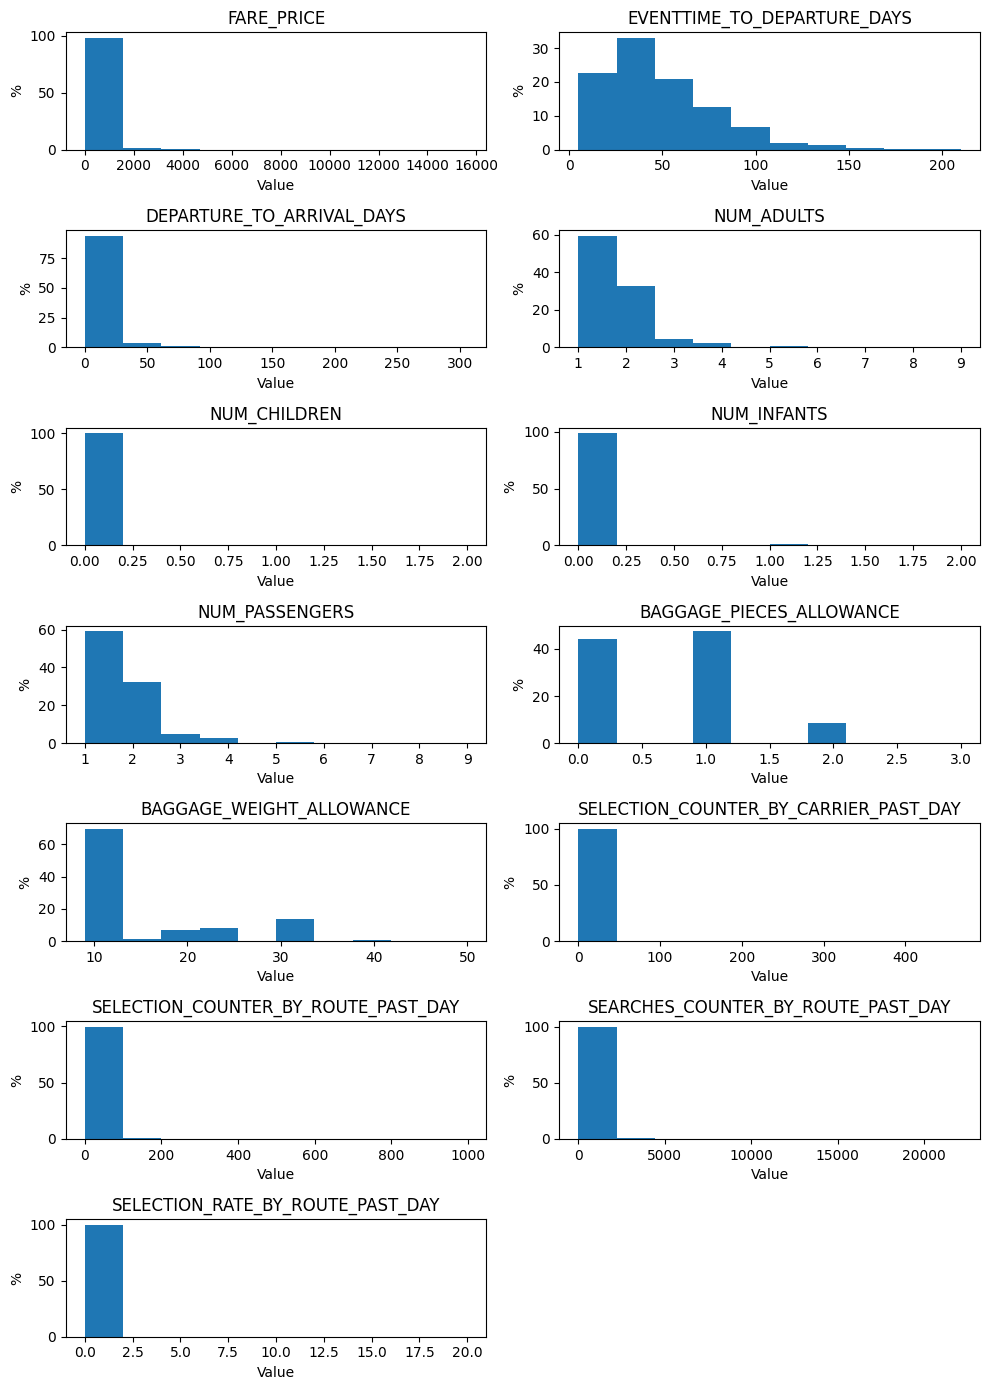

In [25]:
plot_dist(df[num_cols], height=14)

The numbers of passengers seem relatively uniform, but all the other distributions are highly skewed, impying that the other values might have to be log-transformed to stabilize the model training. Interestingly, the selection rate is very low, implying that the customers search a lot and select very little in comparison, demonstrating the need for optimizing the search results.

Plotting the value correlations:

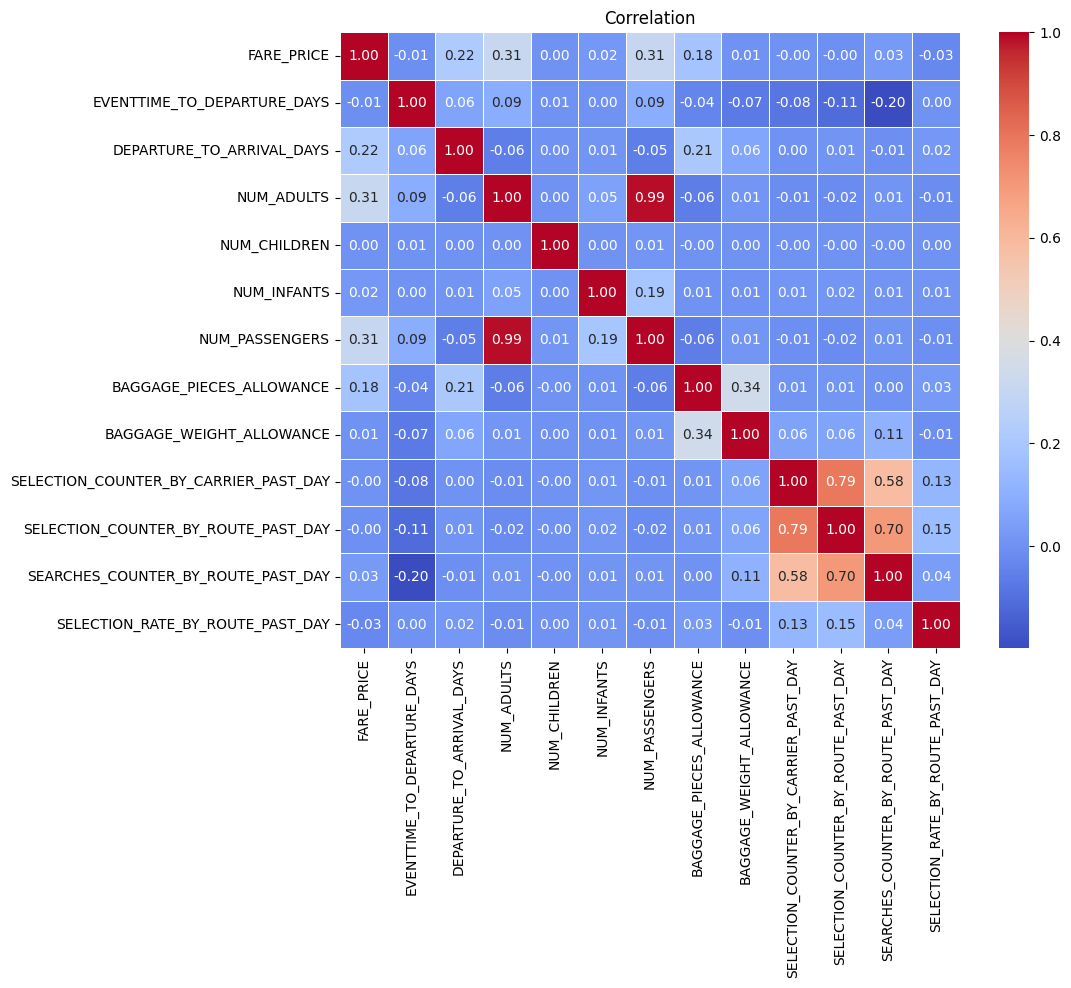

In [26]:
plot_corr(df[num_cols])

The low linear correlation between the price and the other variables suggests that their relationships may be more complex, potentially requiring more complex non-linear regression models to explain the relationships, like neural networks. There is expectably high correlation between the number of passengers and number of adults, because the numbers of children and infants are mostly zeros. There is also a relatively high correlation between the searches and selections, but not high-enough to say that some of those variables are redundant.

### 5.3. Categories

In [27]:
cat_cols = [
  'ORIGIN',
  'DESTINATION',
  'CARRIER_HASH',
  'CABIN_CLASS',
  'TRIP_TYPE',
]

Showing the statistics:



In [28]:
df[cat_cols].describe(include='all')

,ORIGIN,DESTINATION,CARRIER_HASH,CABIN_CLASS,TRIP_TYPE
count,1660004,1660004,1660004,1660004,1660004
unique,959,1083,196,3,2
top,CDG,IST,62d5cbe6ea9e012fab4823c4ce40026d9f1e8d1909abbd...,ECONOMIC_DISCOUNTED,OW
freq,108586,103201,269570,1638687,967565


The **ORIGIN**, **DESTINATION**, and **CARRIER_HASH** have too many classes (959, 1083, and 196, respectively). Therefore, one-hot encoding has to be limited to the most frequent classes. In contrast, the 3 **CABIN_CLASS** classes can be one-hot encoded, and the 2 **TRIP_TYPE** classes can be binary-encoded.

Plotting the class distributions:

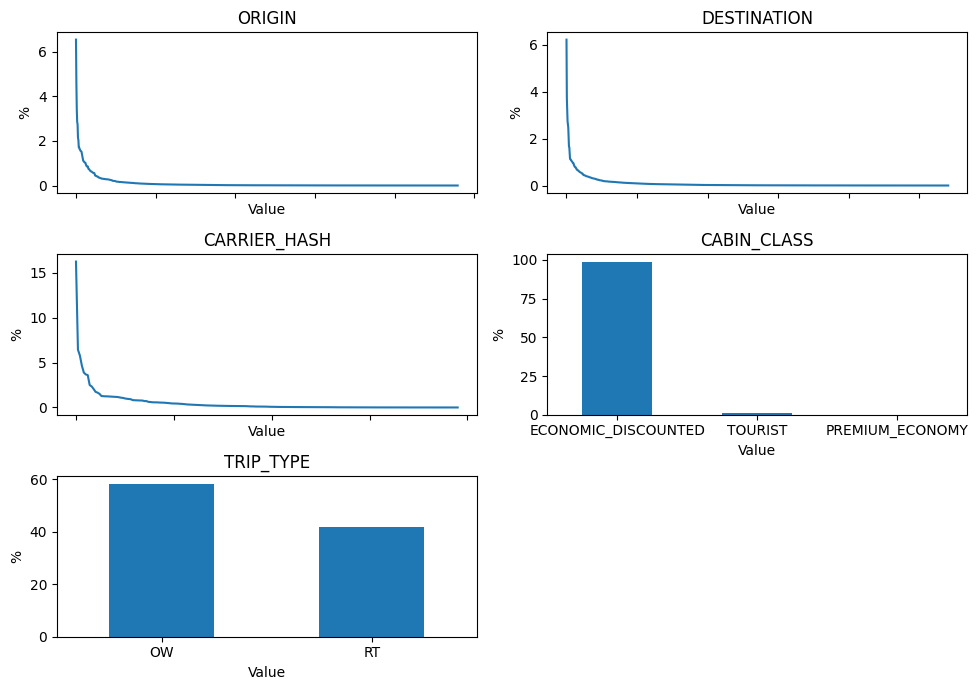

In [29]:
plot_dist(df[cat_cols], height=7, xtype=str)

The curves for the **ORIGIN**, **DESTINATION**, and **CARRIER_HASH** imply that the most frequent classes can be selected using the "knee" ("elbow") method. Furthermore, the plots show high class imbalance in all the cases. This has to be addressed to avoid the bias toward majority classes. 

Using ANOVA to gather more information in order to decide how to handle the imbalance:

In [30]:
anova(df, cat_cols, 'FARE_PRICE', log=True) # log-transform the price to get more like a normal distribution.

,Category,DoF-Numerator,DoF-Denominator,F-statistic,P-Value,Effect
0,ORIGIN,958,1659045,549.886,0.000,0.241
0,DESTINATION,1082,1658921,528.443,0.000,0.256
0,CARRIER_HASH,195,1659808,3507.252,0.000,0.292
0,CABIN_CLASS,2,1660001,568.177,0.000,0.001
0,TRIP_TYPE,1,1660002,214913.749,0.000,0.115


The most influential categories (with the highest effect) are the **CARRIER_HASH**, **DESTINATION**, and **ORIGIN**, which explain a substantial proportion of the variance. The **TRIP_TYPE** has a moderate effect, while the **CABIN_CLASS** has a minimal effect that can be ignored. Therefore, the **CABIN_CLASS** can be removed, while all the other categories must be kept and their class imbalance must be handled to avoid bias.

The imbalance in **ORIGIN**, **DESTINATION**, and **CARRIER_HASH** classes can be handled in neural networks by applying regularization (e.g., dropout) to embedding layers to prevent overfitting to majority classes. However, the **TRIP_TYPE** needs a different approach.

In general, there are 3 commonly used solutions to class imbalance:
1. **Downsampling the majority classes.** The majority class can be downsampled by randomly removing the rows with the majority class to balance the dataset. This approach can preserve the relative feature distributions within the sampled subset, but valuable data is discarded, potentially reducing model performance.
2. **Upsampling the minority class.** The minority class can be upsampled by generating data via methods such as the Synthetic Minority Over-sampling TEchnique (SMOTE). This method generates synthetic data based on existing data patterns, allowing the model to learn from a more balanced dataset. However, the generated data may not fully capture rare edge cases or complex relationships.
3. **Assigning class weights.** The class weights that are inversely proportional to their frequencies can be assigned to samples during training to guide the models more toward the minority class and reduce the bias toward the majority class. This approach is preferable because it ensures that all available data is used without modification.

Unfortunately, due to computing power limitations described in Section 2.5, the training dataset will have to be a smaller proportion of the complete dataset than the usual 80%, and the class imbalance problem will be handled with downsampling. Furthermore, the train-test splitting will have to be stratified to ensure that the class distribution is maintained in both subsets. The stratification cannot be based on all the categories because there would be too many unique combinations - it has to be based on the **TRIP_TYPE** only. 

### 5.4. Lists

In [31]:
lst_cols = [
  'TICKETING_CATEGORY',
  'TICKETING_SUBCATEGORY',
  'CARRIERS',
  'FLIGHTS',
]

#### 5.4.1. Length

Checking if the lists in the same row always have the same length:

In [32]:
if (df[lst_cols].map(len).nunique(axis=1) != 1).sum().sum() == 0:
  print('The lists in the same row always have the same length.')
else:
  print('The lists in the same row can have different lengths.')

The lists in the same row always have the same length.


Conequently, all four lists in the same row can be encoded to the same length-based feature.

Plotting the length distributions:

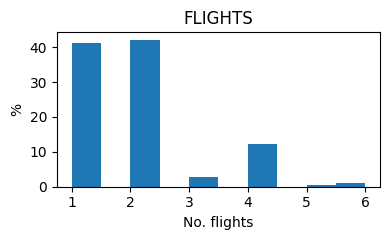

In [33]:
plot_dist(df['FLIGHTS'].map(len), height=2.5, width=4, xlabel='No. flights')

Notably, the itineraries most often consist of one or two flights. In some cases, this integer-based representation could be one-hot encoded to simplify the regression or classification problem. However, in this case, the number of flights could influence the price proportionally, and the integer-based representation allows the regression model to capture this.

#### 5.4.2. Unique items

Checking if the lists in the same row always have the same number of unique items:

In [34]:
if (df[lst_cols].map(lambda x: len(set(x))).nunique(axis=1) != 1).sum().sum() == 0:
  print('The lists in the same row always have the same number of unique items.')
else:
  print('The lists in the same row can have different numbers of unique items.')

The lists in the same row can have different numbers of unique items.


Conequently, the lists in the same row have to be encoded into different features to convey the numbers of unique items.

Plotting the distributions of the numbers of unique items:

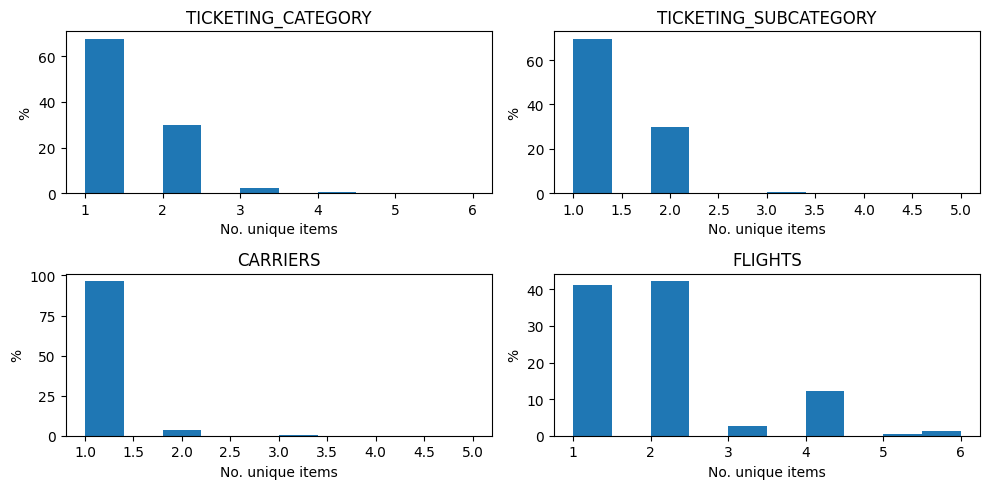

In [35]:
plot_dist(df[lst_cols].map(lambda x: len(set(x))), height=5, xlabel='No. unique items')

Notably, there are mostly one or two unique items in a list, but the reason for preserving the integer-based representation is the same as in Section 5.4.1.

#### 5.4.3. Classes

Showing the number of classes:

In [36]:
pd.DataFrame(
  [(c, df[c].explode().nunique()) for c in lst_cols],
    columns=['category', 'classes']
).set_index('category').T

category,TICKETING_CATEGORY,TICKETING_SUBCATEGORY,CARRIERS,FLIGHTS
classes,17,23178,209,6405


Notably, the number of classes in the **TICKETING_CATEGORY** is small enough for them all to be multi-hot encoded. However, this is not the case for the other variables, where the less frequent classes would have to be ignored. Therefore, the best approach in those cases is to obtain more dense vector representations via word embeddings or sequential models

Plotting the class distributions:

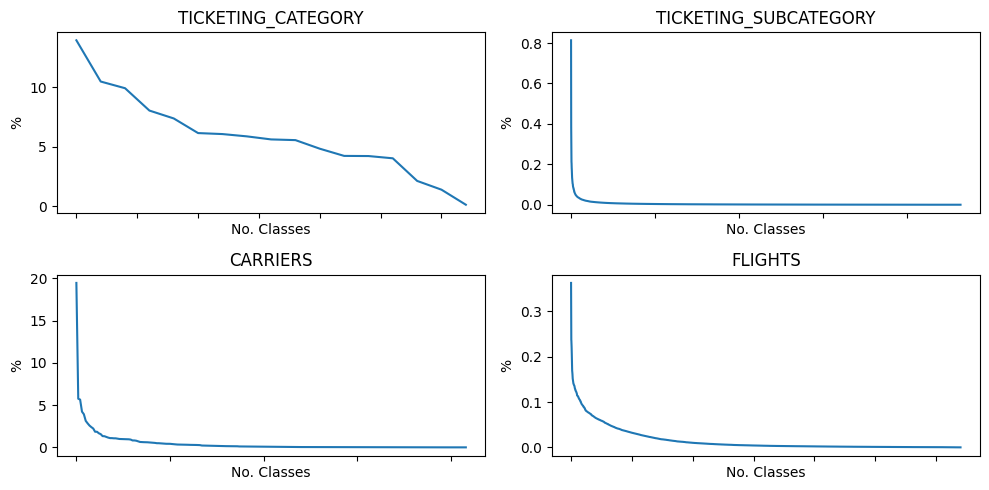

In [37]:
plot_dist(df[lst_cols], height=5, xtype=list[str], xlabel='No. Classes')

Notably, there is a high class imbalance that has to be addressed to avoid bias.

With word embeddings, the class imbalance can be handled while training the Word2Vec model. There are two ways to train such a model: Skip-Gram (SG) and Continuous Bag of Words (CBOW). With SG, the model is trained to predict surrounding words given a target word. This a more detailed approach, good for capturing less frequent classes in larger datasets. With CBOW, the model is trained to predict a target word given its surrounding words. This is more general approach, good for capturing more frequent classes in smaller datasets. In this case, training the Word2Vec model with the SG approach seems more reasonable for handling the imbalance.

Furthermore, the Word2Vec's `sample` hyperparameter can be adjusted to reduce the impact of very frequent classes (words). It controls the probability of discarding a word (w) given by:

$$
P(w) = 1 - \sqrt{\frac{t}{f(w)}}
$$

where:
- t is the `sample` threshold (typically a small value like 1e-3),
- f(w) is the frequency of the word in the corpus.

With sequential models, the imbalance can be handled via regularization (e.g., dropout) to prevent overfitting to majority classes.

## 6. Feature engineering

This section contains the transformations described in Section 5. These transformations are implemented as functions that are applied to training and test sets independently to avoid bias.

### 6.1. Functions
In summary, the functions below are used to transform the dataset as follows:
- *Timestamps*
  - The **EVENTTIME** is encoded into hour of day, day of week, and week of year.
  - The **DEPARTURE_DATE** and **ARRIVAL_DATE** are encoded into day of week and week of year.
- *Numbers*
  - The following numerical variables with highly skewed distributions are log-transformed:
    - **FARE_PRICE**
    - **EVENTTIME_TO_DEPARTURE_DAYS**
    - **DEPARTURE_TO_ARRIVAL_DAYS**
    - **BAGGAGE_PIECES_ALLOWANCE**
    - **BAGGAGE_WEIGHT_ALLOWANCE**
    - **SELECTION_COUNTER_BY_CARRIER_PAST_DAY**
    - **SELECTION_COUNTER_BY_ROUTE_PAST_DAY**
    - **SEARCHES_COUNTER_BY_ROUTE_PAST_DAY**
    - **SELECTION_RATE_BY_ROUTE_PAST_DAY**
  - The following numerical variables with relatively uniform distributions are left "as is":
    - **NUM_ADULTS**
    - **NUM_CHILDREN**
    - **NUM_INFANTS**
    - **NUM_PASSENGERS**
- *Categories*
  - The **ORIGIN**, **DESTINATION**, and **CARRIER_HASH** are one-hot encoded based on the most frequent classes. The subset of classes is selected via the "knee" ("elbow") method based on the frequency curve. This is done to support the use of these variables for training traditional regression models. In the case of neural networks, this is handled via embedding layers.
  - The **TRIP_TYPE** is binary-encoded because it has only 2 classes.
- *Lists*
  - The same encoding methods are applied to all four columns with the lists of categorical values:
    - **TICKETING_CATEGORY**
    - **TICKETING_SUBCATEGORY**
    - **CARRIERS**
    - **FLIGHTS**
  - The total number of items and the numbers of unique items are extracted from the lists.
  - The category classes are encoded into dense vector representations via Word2Vec to support the use of these variables for training traditional regression models. The class imbalance is handled by training the Word2Vec model with the SG method and by adjusting the `sample` parameter. In the case of neural networks, this is handled via embedding layers, sequential models, and regularization.

In [21]:
import numpy as np

from gensim.models import Word2Vec
from kneed import KneeLocator
from typing import Union
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample


def log_transform(df):
  """
  Applies a natural log transformation to the input DataFrame or Series.

  :param df: Input DataFrame or Series with numerical values.
  :return: DataFrame or Series with scaled values, where each value is log(1 + x).
  """
  return np.log1p(df)


def inverse_log_transform(df):
  """
  Applies an inverse natural log transformation to the input DataFrame or Series.

  :param df: Input DataFrame or Series with log-transformed numerical values.
  :return: DataFrame or Series with values at the original scale, where each value is exp(x) - 1.
  """
  return np.expm1(df)


def most_frequent_classes(s:pd.Series):
  """
  Identifies the most frequent classes in a categorical series 
  by applying the knee point method to the frequency distribution.

  :param s: Input pandas Series with categorical values.
  :return: List of the most frequent class labels.
  """
  counts = s.value_counts()
  knee = KneeLocator(
      range(len(counts)),
      counts.tolist(),
      curve='convex',
      direction='decreasing'
  ).knee
  return counts[:knee].index.tolist()


def encode_time(df, col2tod:dict[str,bool]):
  """
  Encodes datetime columns into cyclical features using sine and cosine transformations.

  :param df: Input DataFrame containing datetime columns.
  :param col2tod: Dictionary mapping the column names to boolean values, 
                  where True indicates that the time of day should be encoded.
  :return: DataFrame with encoded time features, including: 
           - Week of Year (WoY), 
           - Day of Week (DoW), 
           - (Optional) Time of Day (ToD).
  """

  def encode(s:pd.Series, cycle_length):
    theta = 2 * np.pi * s / cycle_length
    return np.sin(theta), np.cos(theta)

  encoded = []
  for col, tod in col2tod.items():
    woy_x, woy_y = encode(df[col].dt.isocalendar().week.astype(int), 52)
    dow_x, dow_y = encode(df[col].dt.weekday, 7)
    col2enc = {
      f'{col}_WoY_X': woy_x,
      f'{col}_WoY_Y': woy_y,
      f'{col}_DoW_X': dow_x,
      f'{col}_DoW_Y': dow_y,
    }

    if tod:
      tod_x, tod_y = encode(df[col].dt.hour, 24)
      col2enc.update({
        f'{col}_ToD_X': tod_x,
        f'{col}_ToD_Y': tod_y,
      })

    encoded.append(pd.DataFrame(col2enc))

  return pd.concat(encoded, axis=1)


def encode_bin(df:pd.DataFrame, col2cls:dict[str,list[str]]):
  """
  Encodes categorical columns into binary (one-hot) features.

  :param df: Input DataFrame containing categorical columns.
  :param col2cls: Dictionary mapping column names to a list of class labels to encode.
  :return: DataFrame with one-hot-encoded features.
  """
  encoded = []
  for col, values in col2cls.items():
    encoded.append(pd.DataFrame({
        f'{col}_{val}': (df[col]==val).astype(float) for val in values
    }))

  return pd.concat(encoded, axis=1)


def encode_len(df):
  """
  Extracts the number of items and the number of unique items from each column.

  :param df: Input DataFrame containing lists.
  :return: DataFrame with the following features:
           - `NUM_<column>`: The total number of items (computed only for the first column).
           - `NUM_UNIQUE_<column>`: The number of unique items in each column.
  """
  encoded = {}
  for c in df.columns:
    encoded[f'NUM_{c}'] = df[c].map(len)
    break

  len_unique = lambda x: len(set(x))
  for c in df.columns:
    encoded[f'NUM_UNIQUE_{c}'] = df[c].map(len_unique)

  return pd.DataFrame(encoded)


def encode_vec(df:pd.DataFrame, col2enc:dict[str,Union[int,Word2Vec]]):
  """
  Encodes text data in columns using Word2Vec models.

  :param df: Input DataFrame containing columns with lists of strings.
  :param col2enc: Dictionary mapping column names to vector sizes or trained Word2Vec models. 
                  If an integer is provided, the function will train a new Word2Vec model for that column.
  :return: 
      - A DataFrame with the encoded word vectors, where each word is replaced by its corresponding vector.
      - The updated `col2enc` map with trained Word2Vec models, which can be reused for encoding without retraining.
  """
  def train(s:pd.Series, size:int):
    return Word2Vec(
      sentences=s.tolist(),
      vector_size=size,
      sg=1,
      window=3,
      min_count=1,
      sample=1e-3,
      workers=4
  )

  def pool(x:list, model:Word2Vec):
    if any(w in model.wv for w in x):
      return np.mean([model.wv[w] for w in x if w in model.wv], axis=0)
    else:
      return np.zeros(model.vector_size)

  for col, enc in list(col2enc.items()):
    if isinstance(enc, int):
      col2enc[col] = train(df[col], enc)

  encoded = []
  for col, model in col2enc.items():
     df_vec = pd.DataFrame(df[col].apply(lambda x: pool(x, model)).tolist())
     df_vec.columns = [f'{col}_{i}'for i in range(len(df_vec.columns))]
     df_vec.index = df.index
     encoded.append(df_vec)

  return pd.concat(encoded, axis=1), col2enc


def encode_label(df):
  """
  Encodes categorical columns as label codes.

  :param df: Input DataFrame containing categorical columns.
  :return: DataFrame with label-encoded columns where each category is replaced by its corresponding label code.
  """
  return pd.DataFrame({f'LABEL_{col}': df[col].cat.codes for col in df.columns})


def encode_labels(df):
  def labels(s:pd.Series):
    class2label = {c:i for i, c in enumerate(s.explode().unique())}
    return s.apply(lambda classes: [class2label[c] for c in classes])

  return pd.DataFrame({f'LABELS_{col}': labels(df[col]) for col in df.columns})


def featurize(
    df,
    col2cls:dict[str,list[str]]={},
    col2enc:dict[str,Union[int,Word2Vec]]={},
):
  """
  Applies various transformations and encodings to the input DataFrame:
  - Log transformation for the columns with skewed distribution.
  - Time encoding (cyclical encoding of date and time-related features).
  - One-hot encoding for categorical columns.
  - Length-based features for list-valued columns.
  - Word2Vec embeddings for list-valued columns.
  - Label encoding for categorical and list-valued columns.

  The `col2cls` and `col2enc` parameters are used to specify the classes for one-hot encoding 
  and the vector sizes for Word2Vec embeddings, respectively. These parameters are updated during 
  the training phase and returned to be used in the testing phase.

  :param df: Input DataFrame with features including both numerical and categorical data.
  :param col2cls: Dictionary mapping column names to lists of class labels for encoding.
  :param col2enc: Dictionary mapping column names to vector sizes (or pre-trained Word2Vec models) for encoding.
  :return: 
      - A DataFrame with the newly engineered features.
      - The updated `col2cls` dictionary for one-hot encoding classes.
      - The updated `col2enc` dictionary with trained Word2Vec models.
      - A dictionary mapping feature groups to their corresponding columns.
  """

  df_log = log_transform(df[[
    'FARE_PRICE',
    'EVENTTIME_TO_DEPARTURE_DAYS',
    'DEPARTURE_TO_ARRIVAL_DAYS',
    'BAGGAGE_PIECES_ALLOWANCE',
    'BAGGAGE_WEIGHT_ALLOWANCE',
    'SELECTION_COUNTER_BY_CARRIER_PAST_DAY',
    'SELECTION_COUNTER_BY_ROUTE_PAST_DAY',
    'SEARCHES_COUNTER_BY_ROUTE_PAST_DAY',
    'SELECTION_RATE_BY_ROUTE_PAST_DAY',
  ]])

  df_num = df[[
    'NUM_ADULTS',
    'NUM_CHILDREN',
    'NUM_INFANTS',
    'NUM_PASSENGERS',
  ]]

  df_time = encode_time(df, {
    'EVENTTIME': True,
    'DEPARTURE_DATE': False,
    'ARRIVAL_DATE': False,
  })

  if not col2cls:
    col2cls = {
      'ORIGIN': most_frequent_classes(df['ORIGIN']),
      'DESTINATION': most_frequent_classes(df['DESTINATION']),
      'CARRIER_HASH': most_frequent_classes(df['CARRIER_HASH']),
      'TRIP_TYPE': ['OW'],
    }
  df_bin = encode_bin(df, col2cls)

  df_len = encode_len(df[[
    'TICKETING_CATEGORY',
    'TICKETING_SUBCATEGORY',
    'CARRIERS',
    'FLIGHTS',
  ]])

  if not col2enc:
    col2enc = {
      # For the purpose of this exercise, the vector sizes are chosen based on
      # the number of classes by increasing the vector size by the power of two
      # for every increase in the order of magnitude of the number of classes.
      # But in general, the sizes can be fine-tuned with more experimentation.
      'TICKETING_CATEGORY': 4, # from 17 classes (2 order of magnitude)
      'TICKETING_SUBCATEGORY': 32, # from 23178 classes (5 orders of magnitude)
      'CARRIERS': 8, # from 209 classes (3 orders of magnitude)
      'FLIGHTS': 16, # from 6405 classes (4 orders of magnitude)
    }

  df_vec, col2enc = encode_vec(df, col2enc)

  df_floats = pd.concat([
    df_log,
    df_num,
    df_time,
    df_bin,
    df_len,
    df_vec,
  ], axis=1).astype(float)

  df_label = encode_label(df[[
    'ORIGIN',
    'DESTINATION',
    'CARRIER_HASH',
  ]])

  df_labels = encode_labels(df[[
    'TICKETING_CATEGORY',
    'TICKETING_SUBCATEGORY',
    'CARRIERS',
    'FLIGHTS',
  ]])

  df_result = pd.concat([
    df_floats,
    df_label,
    df_labels
  ], axis=1)

  # Setting the random seed for replicability of the next step:
  np.random.seed(42) 

  # Adding random values to decide on the importance of features:
  df_result['RANDOM'] = np.random.rand(len(df_result))
  # Reason: if a random variable is more important to the regression model
  # then some other feature then that feature can be removed from the model.

  group2cols = {c:[c] for c in [
    'FARE_PRICE',
    'EVENTTIME_TO_DEPARTURE_DAYS',
    'DEPARTURE_TO_ARRIVAL_DAYS',
    'BAGGAGE_PIECES_ALLOWANCE',
    'BAGGAGE_WEIGHT_ALLOWANCE',
    'SELECTION_COUNTER_BY_CARRIER_PAST_DAY',
    'SELECTION_COUNTER_BY_ROUTE_PAST_DAY',
    'SEARCHES_COUNTER_BY_ROUTE_PAST_DAY',
    'SELECTION_RATE_BY_ROUTE_PAST_DAY',
    'RANDOM',
  ]}
  group2cols.update({c:[c] for c in df_result.columns if c.startswith('NUM_')})
  group2cols.update({group:[c for c in df_result.columns if c.startswith(f'{group}_')] for group in [
    'EVENTTIME_WoY',
    'EVENTTIME_DoW',
    'EVENTTIME_ToD',
    'DEPARTURE_DATE_WoY',
    'DEPARTURE_DATE_DoW',
    'ARRIVAL_DATE_WoY',
    'ARRIVAL_DATE_DoW',
    'ORIGIN', 
    'DESTINATION', 
    'CARRIER_HASH', 
    'TRIP_TYPE',
    'TICKETING_CATEGORY',
    'TICKETING_SUBCATEGORY',
    'CARRIERS',
    'FLIGHTS',
  ]})

  return df_result, col2cls, col2enc, group2cols


def aggregate(df, by:str, value:str, group2cols:dict[str,list[str]], f=np.max):
  """
  Aggregates values based on groupings specified in `group2cols` 
  and applies the function `f` on the `value_col` for each group.

  :param df: Input DataFrame containing the data to be aggregated.
  :param by: The column zhat will be used for grouping the values.
  :param value: The column with values that will be aggregated.
  :param group2cols: A dictionary mapping group names to lists of member column names.
  :param f: The aggregation function.
  
  :return: A DataFrame containing the aggregated values for each group.
  """
  df_agg = pd.DataFrame({
    (group, f(df[df[by].isin(cols)][value]))
    for group, cols in group2cols.items()
  })
  df_agg.columns = [by, value]
  df_agg.set_index(by, inplace=True)
  df_agg.sort_values(by=value, ascending=True, inplace=True)
  df_agg.dropna(inplace=True)
  return df_agg


def scale(df, scaler=None):
  """
  Scales the input DataFrame using a specified scaler (default is min-max).

  :param df: Input DataFrame with numerical features to be scaled.
  :param scaler: A pre-defined scaler. If None, min-max scaler is used.
  :return: A DataFrame with scaled values and the fitted scaler.
  """
  if scaler is None:
    scaler = MinMaxScaler()
    scaler.fit(df)

  df_scaled = pd.DataFrame(scaler.transform(df))
  df_scaled.columns = df.columns
  df_scaled.index = df.index
  return df_scaled, scaler


def downsample(df, random_state=42):
  """
  Downsamples the majority 'TRIP_TYPE' class to balance the dataset.

  :param df: Input DataFrame with the 'TRIP_TYPE' column.
  :param random_state: Random seed for reproducibility of the sampling process.
  :return: A DataFrame with balanced class distribution.
  """
  df_majority = df[df['TRIP_TYPE']=='OW']
  df_minority = df[df['TRIP_TYPE']=='RT']
  if len(df_majority) < len(df_minority):
    df_minority, df_majority = df_majority, df_minority

  df_majority = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=random_state)
  return pd.concat([df_minority, df_majority])


def stratified_split(df, test_size=0.5, random_state=42):
  """
  Splits the input DataFrame into training and testing sets while preserving 
  the class distribution of 'TRIP_TYPE' using stratified sampling.

  :param df: Input DataFrame containing the data to be split.
  :param test_size: Proportion of the dataset to include in the test split (default is 50%).
  :param random_state: Random seed for reproducibility of the split.
  :return: Training and testing sets as two DataFrames.
  """
  return train_test_split(
    df, 
    test_size=test_size,
    stratify=df['TRIP_TYPE'],
    random_state=random_state
  )

### 6.2. Transformations

Applying downsampling and stratified splitting:

In [22]:
df_train, df_test = stratified_split(downsample(df), test_size=0.5)

**Note**: The training and testing datasets are sampled in 50:50 ratio, instead of the usual 80:20 ratio, due to the computing power limitations.

Featurizing the training and test sets:

In [23]:
df_train_feat, col2cls, col2enc, group2cols = featurize(df_train)
df_test_feat, _, _, _ = featurize(df_test, col2cls, col2enc)

Splitting the training and test set to inputs (x) and outputs (y):

In [24]:
x_train = df_train_feat[[c for c in df_train_feat.columns if c != 'FARE_PRICE']]
x_test = df_test_feat[[c for c in df_test_feat.columns if c != 'FARE_PRICE']]
y_train = df_train_feat[['FARE_PRICE']]
y_test = df_test_feat[['FARE_PRICE']]

Scaling all features except labels:

In [25]:
x_train_scaled, x_scaler = scale(x_train[[c for c in x_train.columns if not c.startswith('LABEL')]])
x_test_scaled, _ = scale(x_test[[c for c in x_test.columns if not c.startswith('LABEL')]], x_scaler)
x_train_labels = x_train.drop(columns=x_train_scaled.columns)
x_test_labels = x_test.drop(columns=x_test_scaled.columns)
y_train_scaled, y_scaler = scale(y_train)
y_test_scaled, _ = scale(y_test, y_scaler)

Freeing up the memory:

In [26]:
del df, df_train, df_train_feat, df_test_feat, x_train, x_test # Saving df_test for later use.

Plotting the price distribution to demonstrate the benefit of log-transformation:

<Axes: title={'center': 'Log-Transformed Price'}, ylabel='Frequency'>

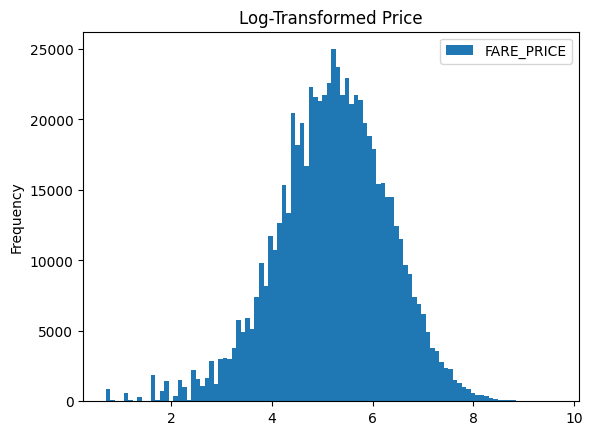

In [27]:
y_train.plot(kind='hist', bins=100, title='Log-Transformed Price')

Obviously, the price has normal distribution after log-transformation, which is much easier for a regression model to learn.

Inverse-scaling the log-transformed price for testing purposes:

In [28]:
y_true = inverse_log_transform(y_test) # This will be compared with inverse-scaled predictions.

## 7. Model Selection
This section contains the implementation of the model selection process.

### 7.1. Metrics

The regression models are evaluated by 3 commonly used metrics described below.

#### 7.1.1. Mean Absolute Error (MAE)
MAE calculates the average absolute differences between predicted and actual values at the value scale (in this case €)::

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |
$$

It is easy to interpret, but it treats all errors equally.

#### 7.1.2. Root Mean Squared Error (RMSE)
RMSE is the square root of the average squared differences between actual and predicted values at the value scale (€):

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

It penalizes large errors more than MAE, making it sensitive to outliers, but also harder to interpret.

#### 7.1.3. Mean Absolute Percentage Error (MAPE)
MAPE expresses the error as a percentage of the actual values:

$$
MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

It is easy to interpret and compare across different scales. In general, its drawback is the division by zero or a very small value, but that won't be the case with the actual price.

In [30]:
from sklearn import metrics

def evaluate(true, pred):
  return {
    'MAE [€]': metrics.mean_absolute_error(true, pred),
    'RMSE [€]': metrics.root_mean_squared_error(true, pred),
    'MAPE [%]': 100 * metrics.mean_absolute_percentage_error(true, pred),
  }

### 7.1. Traditional models

The traditional regression approach is implemented using two widely recognized tree-based models: Random Forest and XGBoost. While other models, such as Support Vector Machines, could also be used, these were chosen for their simplicity and because they employ two fundamentally distinct ensemble methods: bagging and boosting, respectively.

#### 7.1.1. Training

Preparing the training function:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from typing import Literal


def build_trees(x, y, method:Literal['RF','XGB'], **kwargs):
  """
  Builds a regression model using either Random Forest (RF) or eXtreme Gradient Boosting (XGB).

  :param x: Input features (DataFrame) for model training.
  :param y: Target variable (DataFrame or Series) for model training.
  :param method: A string indicating the regression method to use ('RF' or 'XGB').
  :param kwargs: Additional arguments passed to the model as hyperparameters.
  :return: A tuple containing the trained model and a DataFrame with feature importances.
  """
  method2type = {
    'RF': RandomForestRegressor,
    'XGB': XGBRegressor,
  }
  regressor = method2type[method](**kwargs)
  model = regressor.fit(x.values, y.values.ravel())
  df_importances = pd.DataFrame(zip(x.columns, model.feature_importances_))
  df_importances.columns = ['Feature', 'Importance']
  return model, df_importances

Training the models to choose the better one:

In [38]:
from datetime import datetime

method2importances = {}
for method in ['RF', 'XGB']:
  start_time = datetime.now()

  model, df_imp = build_trees(
    x_train_scaled, 
    y_train_scaled, 
    method, 
    # Hyperparameters:
    n_estimators=100, # Moderate number of trees for balancing processing speed and accuracy.
    max_depth=10,     # Moderate tree depth for faster learning and preventing overfitting.
    n_jobs=-1,        # Use all available cores.
    random_state=42   # Support replicability.
  )

  end_time = datetime.now()
  method2importances[method] = aggregate(df_imp, 'Feature', 'Importance', group2cols)
  r2 = round(model.score(x_test_scaled.values, y_test_scaled.values.ravel()), 3)
  minutes = round((end_time - start_time).total_seconds() / 60, 3)
  print(f'{method} R^2 score: {r2}, Duration: {minutes} minutes')

RF R^2 score: 0.75, Duration: 23.913 minutes
XGB R^2 score: 0.977, Duration: 1.234 minutes


According to the R<sup>2</sup> score (coefficient of determination), XGB is better than RF, because the best possible score is 1, and lower values imply worse accuracy. Furthermore, XGB converges much faster than RF, making it overall a better choice.

Plotting the feature importance on a log scale:

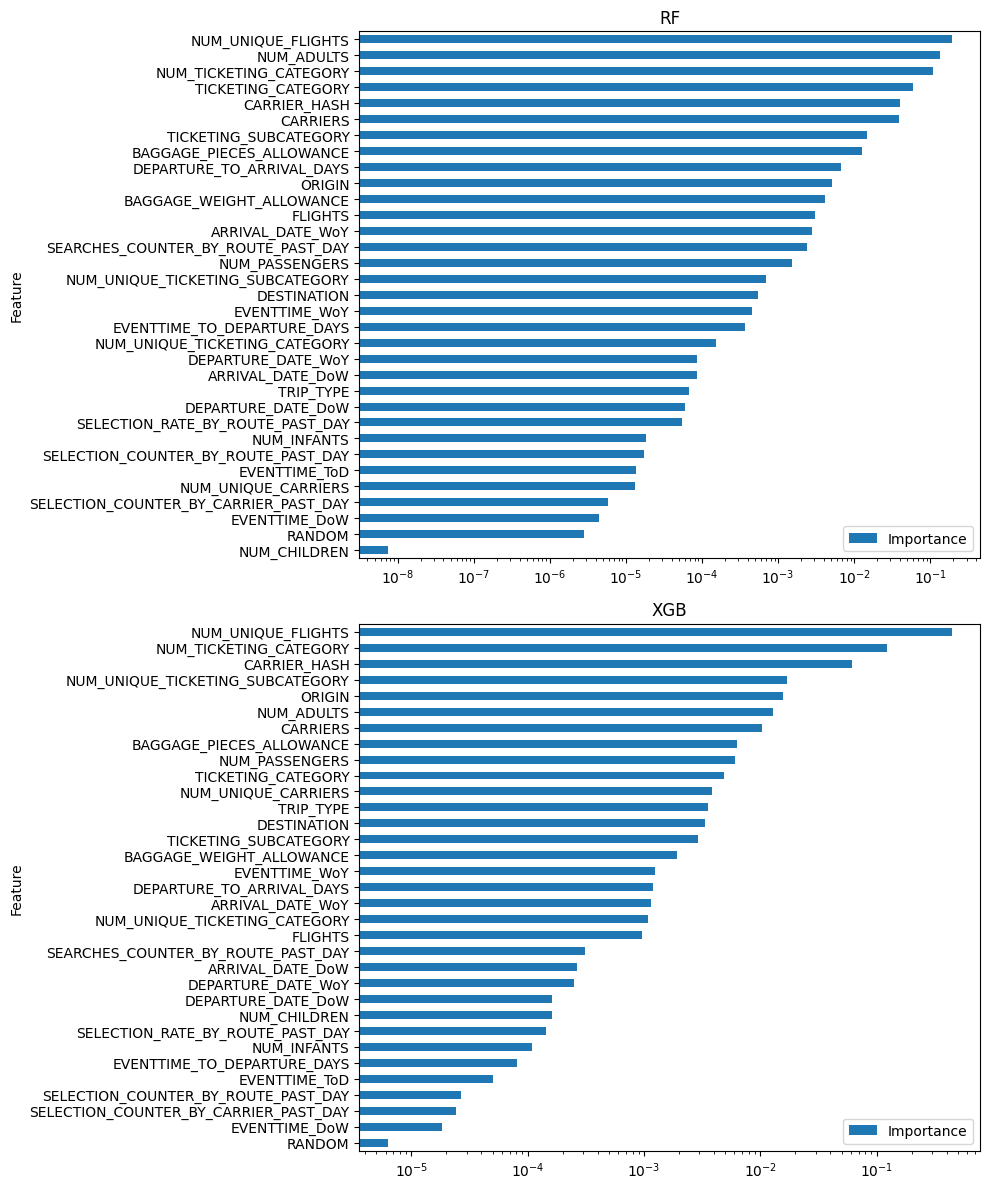

In [171]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
for ax, m, i in zip(axes, method2importances.keys(), method2importances.values()):
  i.plot(ax=ax, kind='barh')
  ax.set_title(m)
  ax.set_xscale('log')
plt.tight_layout()
plt.show()

Notably, all the features are more important than the random values, meaning that they are indeed related to the price to some degree and should not be removed.

Training the XGB model for inference with the same hyperparameters as above but without the random values:

In [45]:
xgb, _ = build_trees(
  x_train_scaled.drop(columns=['RANDOM']), 
  y_train_scaled, 
  'XGB', 
  n_estimators=100,
  max_depth=10,
  n_jobs=-1,
  random_state=42
)

#### 7.1.2. Testing

Obtaining and inverse-scaling the predictions:

In [46]:
y_pred_scaled = xgb.predict(x_test_scaled.drop(columns=['RANDOM'])).reshape(-1, 1)
y_pred = pd.DataFrame(inverse_log_transform(y_scaler.inverse_transform(y_pred_scaled)))
y_pred.columns = ['FARE_PRICE_PREDICTED']
y_pred.index = y_test.index

Evaluating the predictions on the test set:

In [215]:
evaluate(y_true, y_pred)

{'MAE [€]': 25.655265154240155,
 'RMSE [€]': 80.57894332822485,
 'MAPE [%]': 7.663875615014604}

The ~7.7% error shows that the XGB model performs fairly well in relative terms. However, the large difference between the mean absolute error (~26€) and the root mean squared error (~81€) indicates that there are some extreme errors. This implies that we might require the use of neural networks to handle more complex non-linear relationships between the features and the taraget variable. 

Showing the scatter plot with true prices (x-axis) and predicted prices (y-axis):

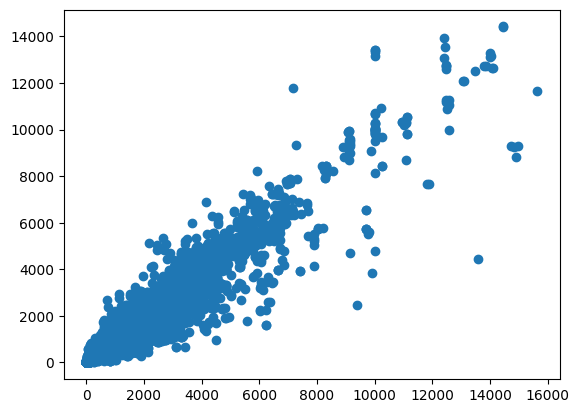

In [218]:
plt.scatter(y_true, y_pred)

The scatter plot shows higher dispersion for higher prices. This is because they are more rare and the model didn't bother to learn them. One reason for this could be the 50:50 train-test split, and that the model simply needs more data. If that is not the case, then this problem could be addressed by assigning larger weights to samples with higher prices in order to force the model to learn them better. However, the higher prices might not be as important as the lower ones for the business use case. Therefore, the model needs to be tested with more data and further actions need to be discussed with stakeholders.

Calculating error statistics:

In [ ]:
y_error = (y_true - y_pred).abs()
y_error.columns = ['Error [€]']
y_error.index = y_true.index
y_error.describe()

,Error [€]
count,692439.000
mean,25.655
std,76.386
min,0.000
25%,2.744
50%,8.177
75%,22.937
max,9121.328


The statistics confirm the skewness of the error.

Plotting the error distribution:

<Axes: title={'center': 'Prediction Errors'}, ylabel='Frequency'>

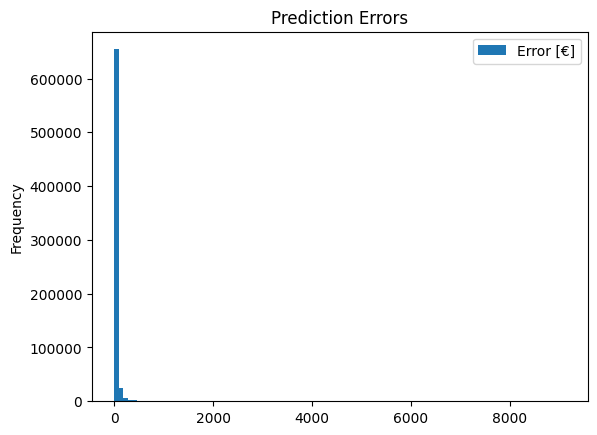

In [224]:
y_error.plot(kind='hist', bins=100, title='Prediction Errors')

The error distribution clearly shows that most of them are very small, i.e., that there is only a small number of larger errors.

Printing the average prices accross some categorical variables just for demonstration purposes:

In [54]:
pd.concat([df_test[['TRIP_TYPE']], y_true, y_pred], axis=1).groupby('TRIP_TYPE', observed=False).mean()

,FARE_PRICE,FARE_PRICE_PREDICTED
TRIP_TYPE,,
OW,217.459,208.961
RT,423.404,413.682


In [55]:
pd.concat([df_test[['DESTINATION']], y_true, y_pred], axis=1).groupby('DESTINATION', observed=False).mean()

,FARE_PRICE,FARE_PRICE_PREDICTED
DESTINATION,,
AAE,159.529,142.815
AAL,191.096,199.563
AAR,483.159,476.572
ABJ,285.487,277.278
ABQ,1670.333,1559.641
...,...,...
ZQN,1605.539,1222.343
ZRH,222.788,218.879
ZTH,97.096,105.394


In [63]:
pd.concat([df_test['DEPARTURE_DATE'].dt.weekday.to_frame('DEPARTURE_WEEKDAY'), y_true, y_pred], axis=1).groupby('DEPARTURE_WEEKDAY', observed=False).mean()

,FARE_PRICE,FARE_PRICE_PREDICTED
DEPARTURE_WEEKDAY,,
0,318.249,309.064
1,323.229,313.381
2,322.988,314.022
3,313.689,304.776
4,320.346,311.837
5,339.539,329.910
6,306.589,297.265


The statistics like these could be used for search optimization.

### 7.2. Neural Networks
The neural networks are built with simple feedforward layers to handle numeric variables, and with embeddings and commonly used sequential models (LSTM, GRU, and Transformers) to handle categorical variables.

#### 7.2.1. Functions
Preparing compile and plot functions for later use:

In [ ]:
import keras
import keras_nlp
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from typing import Literal


def compile_nn(
    x_train_floats:pd.DataFrame,
    x_train_labels:pd.DataFrame,
    x_test_floats:pd.DataFrame,
    x_test_labels:pd.DataFrame,
    seq_type:Literal['LSTM','GRU','T']='T',
    embed_dim=16,
    embed_drop=0.2,
    hidden_dim=32,
    num_heads=4,
):
  """
  Compiles a neural network model for predicting the price from floats and labels.

  :param x_train_floats: DataFrame containing floats for training.
  :param x_train_labels: DataFrame containing labels for training.
  :param x_test_floats: DataFrame containing floats for testing.
  :param x_test_labels: DataFrame containing labels for testing.
  :param seq_type: Type of sequential model to use for multi-labeled categorical features. Options:
    - 'LSTM': Long Short-Term Memory
    - 'GRU': Gated Recurrent Unit
    - 'T': Transformer
  :param embed_dim: Dimension of embeddings for categorical features.
  :param embed_drop: Dropout rate for embedding layers to handle class imbalance.
  :param hidden_dim: Number of hidden units for sequential layers.
  :param num_heads: Number of transformer attention heads.
  :return: 
    - Compiled keras model ready for training.
    - Training inputs for the model.
    - Test inputs for the model.
  """
  def embedding_layer(input_name, vocab_size):
    input_layer = tf.keras.layers.Input(shape=(1,), name=input_name)
    hidden_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)(input_layer)
    hidden_layer = tf.keras.layers.Dropout(embed_drop)(hidden_layer)
    hidden_layer = tf.keras.layers.Flatten()(hidden_layer)
    hidden_layer = tf.keras.layers.Dense(embed_dim, activation='relu')(hidden_layer)
    return input_layer, hidden_layer
  
  def sequence_layer(input_name, vocab_size, seq_length):
    input_layer = tf.keras.layers.Input(shape=(seq_length,), name=input_name)
    hidden_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)(input_layer)
    hidden_layer = tf.keras.layers.Dropout(embed_drop)(hidden_layer)
  
    if seq_type == 'LSTM':
      hidden_layer = tf.keras.layers.LSTM(hidden_dim)(hidden_layer)
    elif seq_type == 'GRU':
      hidden_layer = tf.keras.layers.GRU(hidden_dim)(hidden_layer)
    elif seq_type == 'T':
      hidden_layer = keras_nlp.layers.PositionEmbedding(sequence_length=seq_length, initializer='zeros')(hidden_layer)
      hidden_layer = keras_nlp.layers.TransformerEncoder(num_heads=num_heads, intermediate_dim=hidden_dim)(hidden_layer)
      hidden_layer = tf.keras.layers.GlobalAveragePooling1D()(hidden_layer)
    else:
      raise ValueError(f'Invalid sequence layer type: {seq_type}.')

    return input_layer, hidden_layer

  # Datasets:
  train_inputs = {}
  test_inputs = {}

  # Columns:
  labels = [c.replace('LABEL_', '').replace('LABELS_', '') for c in x_train_labels.columns]
  floats = [c for c in x_train_floats.columns if not [_ for _ in labels if c.startswith(_)] and c != 'RANDOM']
  single_labels = [c for c in x_train_labels.columns if c.startswith('LABEL_')]
  multi_labels = [c for c in x_train_labels.columns if c.startswith('LABELS_')]

  # Floats:
  float_inputs = tf.keras.layers.Input(shape=(len(floats),), name="FLOATS")
  train_inputs['FLOATS'] = x_train_floats[floats].values
  test_inputs['FLOATS'] = x_test_floats[floats].values

  # Labels:
  label_inputs = []
  label_outputs = []
  
  # Single-labeled categorical features (strings):
  for c in single_labels:
    name = c.replace('LABEL_', '')
    max_len = x_train_labels[c].max()+1
    i, o = embedding_layer(name, max_len)
    label_inputs.append(i)
    label_outputs.append(o)
    train_inputs[name] = x_train_labels[c].values
    test_inputs[name] = x_test_labels[c].values
  
  # Multi-labeled categorical features (lists of strings):
  for c in multi_labels:
    name = c.replace('LABELS_', '')
    max_len = x_train_labels[c].map(len).max()+1
    num_classes = x_train_labels[c].explode().nunique()
    i, o = sequence_layer(name, num_classes, seq_length=max_len)
    label_inputs.append(i)
    label_outputs.append(o)
    train_inputs[name] = pad_sequences(x_train_labels[c], maxlen=max_len, padding='post')
    test_inputs[name] = pad_sequences(x_test_labels[c], maxlen=max_len, padding='post')
  
  # Fully-connected layers:
  nn = tf.keras.layers.Concatenate()([float_inputs] + label_outputs)
  nn = tf.keras.layers.Dense(128, activation='relu')(nn)
  nn = tf.keras.layers.Dense(64, activation='relu')(nn)
  nn = tf.keras.layers.Dense(32, activation='relu')(nn)
  output = tf.keras.layers.Dense(1, activation='linear', name='FARE_PRICE')(nn)
  
  # Compiled model:
  model = keras.models.Model(inputs=[float_inputs] + label_inputs, outputs=output)
  model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
  return model, train_inputs, test_inputs


def plot_learning_curves(history):
  """Plots the learning curves from the fit history."""
  df_history = pd.DataFrame(history.history).rename_axis('epoch')
  _, axes = plt.subplots(1, 3, figsize=(15, 5))
  df_history[['loss', 'val_loss']].plot(ax=axes[0])
  df_history[['mse', 'val_mse']].plot(ax=axes[1])
  df_history[['mae', 'val_mae']].plot(ax=axes[2])
  plt.show()

#### 7.2.2. Compiling

Compiling neural networks with different types of underlying sequential models:

In [ ]:
lstm, train_inputs, test_inputs = compile_nn(x_train_scaled, x_train_labels, x_test_scaled, x_test_labels, 'LSTM')
gru, _, _ = compile_nn(x_train_scaled, x_train_labels, x_test_scaled, x_test_labels, 'GRU')
transformer, _, _ = compile_nn(x_train_scaled, x_train_labels, x_test_scaled, x_test_labels, 'T')

Showing the LSTM-based model:

In [33]:
lstm.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ORIGIN (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DESTINATION         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CARRIER_HASH        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 1, 16)     │     15,344 │ ORIGIN[0][0]      │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, 1, 16)     │     17,328 │ DESTINATION[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 1, 16)     │      3,136 │ CARRIER_HASH[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TICKETING_CATEGORY  │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TICKETING_SUBCATEG… │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CARRIERS            │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FLIGHTS             │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 1, 16)     │          0 │ embedding_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 1, 16)     │          0 │ embedding_8[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 1, 16)     │          0 │ embedding_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 7, 16)     │        272 │ TICKETING_CATEGO… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 7, 16)     │    345,392 │ TICKETING_SUBCAT… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 7, 16)     │      3,344 │ CARRIERS[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 7, 16)     │    102,208 │ FLIGHTS[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 16)        │          0 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 550,049 (2.10 MB)

 Trainable params: 550,049 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

Showing the GRU-based model:

In [34]:
gru.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ORIGIN (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DESTINATION         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CARRIER_HASH        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 1, 16)     │     15,344 │ ORIGIN[0][0]      │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 1, 16)     │     17,328 │ DESTINATION[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_16        │ (None, 1, 16)     │      3,136 │ CARRIER_HASH[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TICKETING_CATEGORY  │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TICKETING_SUBCATEG… │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CARRIERS            │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FLIGHTS             │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 1, 16)     │          0 │ embedding_14[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 1, 16)     │          0 │ embedding_15[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 1, 16)     │          0 │ embedding_16[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_17        │ (None, 7, 16)     │        272 │ TICKETING_CATEGO… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_18        │ (None, 7, 16)     │    345,392 │ TICKETING_SUBCAT… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_19        │ (None, 7, 16)     │      3,344 │ CARRIERS[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_20        │ (None, 7, 16)     │    102,208 │ FLIGHTS[0][0]     │
│ (Embedding)         │                   │            │                 

 Total params: 544,161 (2.08 MB)

 Trainable params: 544,161 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Showing the Transformer-based model:

In [35]:
transformer.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ TICKETING_CATEGORY  │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TICKETING_SUBCATEG… │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CARRIERS            │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FLIGHTS             │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ORIGIN (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DESTINATION         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CARRIER_HASH        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_24        │ (None, 7, 16)     │        272 │ TICKETING_CATEGO… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_25        │ (None, 7, 16)     │    345,392 │ TICKETING_SUBCAT… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_26        │ (None, 7, 16)     │      3,344 │ CARRIERS[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_27        │ (None, 7, 16)     │    102,208 │ FLIGHTS[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_21        │ (None, 1, 16)     │     15,344 │ ORIGIN[0][0]      │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_22        │ (None, 1, 16)     │     17,328 │ DESTINATION[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_23        │ (None, 1, 16)     │      3,136 │ CARRIER_HASH[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 7, 16)     │          0 │ embedding_24[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_26          │ (None, 7, 16)     │          0 │ embedding_25[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 7, 16)     │          0 │ embedding_26[0][… │
│ (Dropout)           │                   │            │                 

 Total params: 526,113 (2.01 MB)

 Trainable params: 526,113 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

#### 7.2.3. Training

Training neural networks in few epochs to choose one of them:

In [36]:
print('Neural Network with LSTM layers:')
lstm.fit(train_inputs, y_train_scaled, epochs=3, batch_size=32, validation_split=0.2, verbose=1)

print('Neural Network with GRU layers:')
gru.fit(train_inputs, y_train_scaled, epochs=3, batch_size=32, validation_split=0.2, verbose=1)

print('Neural Network with Transformer layers:')
transformer.fit(train_inputs, y_train_scaled, epochs=3, batch_size=32, validation_split=0.2, verbose=1)

Neural Network with LSTM layers:
Epoch 1/3
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 477s 26ms/step - loss: 0.0029 - mae: 0.0355 - mse: 0.0029 - val_loss: 7.2650e-04 - val_mae: 0.0182 - val_mse: 7.2650e-04
Epoch 2/3
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 413s 24ms/step - loss: 7.0278e-04 - mae: 0.0185 - mse: 7.0278e-04 - val_loss: 5.4939e-04 - val_mae: 0.0163 - val_mse: 5.4939e-04
Epoch 3/3
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 441s 25ms/step - loss: 5.2688e-04 - mae: 0.0158 - mse: 5.2688e-04 - val_loss: 4.3983e-04 - val_mae: 0.0140 - val_mse: 4.3983e-04
Neural Network with GRU layers:
Epoch 1/3
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 460s 26ms/step - loss: 0.0032 - mae: 0.0364 - mse: 0.0032 - val_loss: 7.0915e-04 - val_mae: 0.0178 - val_mse: 7.0915e-04
Epoch 2/3
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 438s 25ms/step - loss: 7.0557e-04 - mae: 0.0185 - mse: 7.0557e-04 - val_loss: 5.0594e-04 - val_mae: 0.0147 - val_mse: 5.0594e-04
Epoch 3/3
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 449s 26ms/step - loss: 5.3364e-04 - mae: 0.0159 

c:\Users\igorm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['embedding_24/embeddings', 'embedding_25/embeddings', 'embedding_26/embeddings', 'embedding_27/embeddings'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


17311/17311 ━━━━━━━━━━━━━━━━━━━━ 337s 18ms/step - loss: 0.0061 - mae: 0.0571 - mse: 0.0061 - val_loss: 0.0035 - val_mae: 0.0438 - val_mse: 0.0035
Epoch 2/3
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 318s 18ms/step - loss: 0.0035 - mae: 0.0437 - mse: 0.0035 - val_loss: 0.0030 - val_mae: 0.0399 - val_mse: 0.0030
Epoch 3/3
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 398s 23ms/step - loss: 0.0031 - mae: 0.0408 - mse: 0.0031 - val_loss: 0.0027 - val_mae: 0.0375 - val_mse: 0.0027


Notably, the neural network with the simplest sequental model (GRU) has the smallest validation loss, implying that the learning problem might not be so difficult that it requires more complex models (LSTM and Transformers). However, since the comparison is made only after several epochs, things might change after more training, with different hyperparameters, and with more data.

Continuing training of the chosen model for more epochs:

In [ ]:
history = gru.fit(train_inputs, y_train_scaled, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 484s 28ms/step - loss: 4.4083e-04 - mae: 0.0144 - mse: 4.4083e-04 - val_loss: 4.0253e-04 - val_mae: 0.0134 - val_mse: 4.0253e-04
Epoch 2/30
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 422s 24ms/step - loss: 3.8834e-04 - mae: 0.0135 - mse: 3.8834e-04 - val_loss: 3.2820e-04 - val_mae: 0.0112 - val_mse: 3.2820e-04
Epoch 3/30
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 440s 25ms/step - loss: 3.5031e-04 - mae: 0.0127 - mse: 3.5031e-04 - val_loss: 3.3226e-04 - val_mae: 0.0120 - val_mse: 3.3226e-04
Epoch 4/30
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 396s 23ms/step - loss: 3.2105e-04 - mae: 0.0122 - mse: 3.2105e-04 - val_loss: 2.7422e-04 - val_mae: 0.0103 - val_mse: 2.7422e-04
Epoch 5/30
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 524s 30ms/step - loss: 3.0041e-04 - mae: 0.0117 - mse: 3.0041e-04 - val_loss: 2.7404e-04 - val_mae: 0.0103 - val_mse: 2.7404e-04
Epoch 6/30
17311/17311 ━━━━━━━━━━━━━━━━━━━━ 488s 28ms/step - loss: 2.8066e-04 - mae: 0.0113 - mse: 2.8066e-04 - val_loss: 2.6435e-04 - 

Plotting the learning curves:

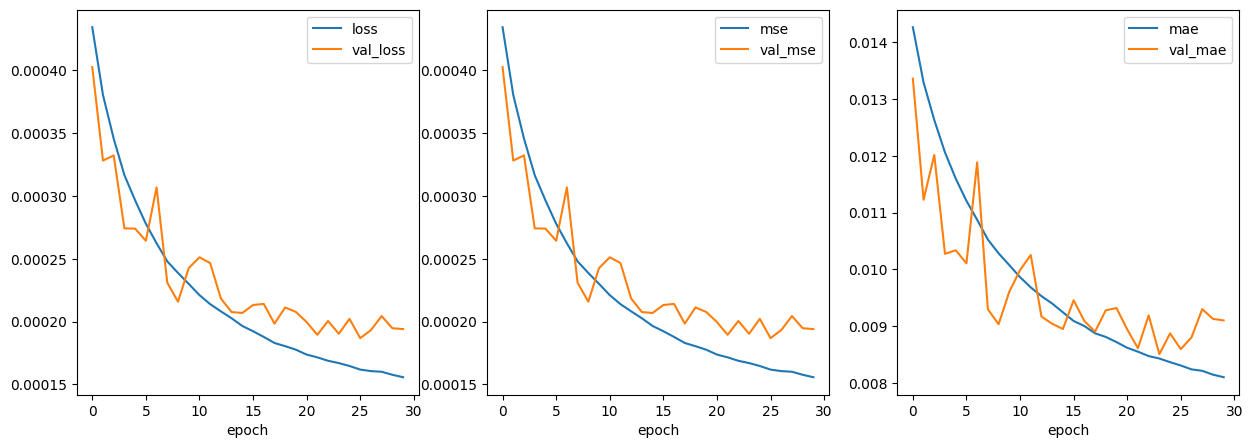

In [65]:
plot_learning_curves(history)

Both training and validation errors decrease over epochs, meaning that the model is improving. Furthermore, the differences between training and validation errors remain small, suggesting the model is generalizing well. The fluctiation of the validation errors indicates minor instability, probably due to small dataset noise or slight overfitting, which can be addressed by reducing the learning rate. Overall, the training should continue. In reality, the number of epochs would be orders of magnitude larger. However, this is impossible to do on a laptop in short time.





#### 7.2.4. Testing

Obtaining and inverse-scaling the predictions:

In [38]:
y_pred_scaled = gru.predict(test_inputs).reshape(-1, 1)
y_pred = pd.DataFrame(inverse_log_transform(y_scaler.inverse_transform(y_pred_scaled)))
y_pred.columns = ['FARE_PRICE_PREDICTED']
y_pred.index = y_test.index

21639/21639 ━━━━━━━━━━━━━━━━━━━━ 159s 7ms/step


Evaluating the predictions on the test set:

In [67]:
evaluate(y_true, y_pred)

{'MAE [€]': 223.7010153617425,
 'RMSE [€]': 404.6060707666964,
 'MAPE [%]': 195.59406512759915}

Notably, the errors are unacceptably high, probably because the model was not trained long enough with enough data. This implies that further training and testing is needed to decide whether the use of neural networks is indeed better than traditional regression models. On the other hand, if the computing resources are limited, the traditional models from Section 7.1 such as XGB are good-enough.

## Future Work

**Features**:
- The non-periodic time features, such as holiday indicators or distances to/from holidays, could be added to the feature set as valuable inputs.
- The origin and destination could be described with geospatial features, climate/weather features, socio-economic features, etc.

**Models**:
- The accuracy could be improved using metaheuristic optimization instead of the "rule of thumb" for adjusting the hyperparameters.
- The tensorflow could be combined with large-scale data access libraries like the petastorm, to handle real-world data. 
- The frameworks like the Spark MLlib could be used to distribute processing for the traditional regression models.
- The neural network training and testing should continue over more epochs, with more data and reduced learning rate.

**Visualizations**
- The predictions could be visualized in many more different ways, depending on what the stakeholders would like to see. For example, the predictions could be averaged across the categorical features or across the binned numerical features to get more insights into the distribution of prices. This can also be done for errors to get insights on how to model could be further improved.